In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.colors import Normalize

#geopandasは pip install geopandas　してね

In [4]:
data = gpd.read_file("./r02_kobe_suma.shp")

<AxesSubplot:>

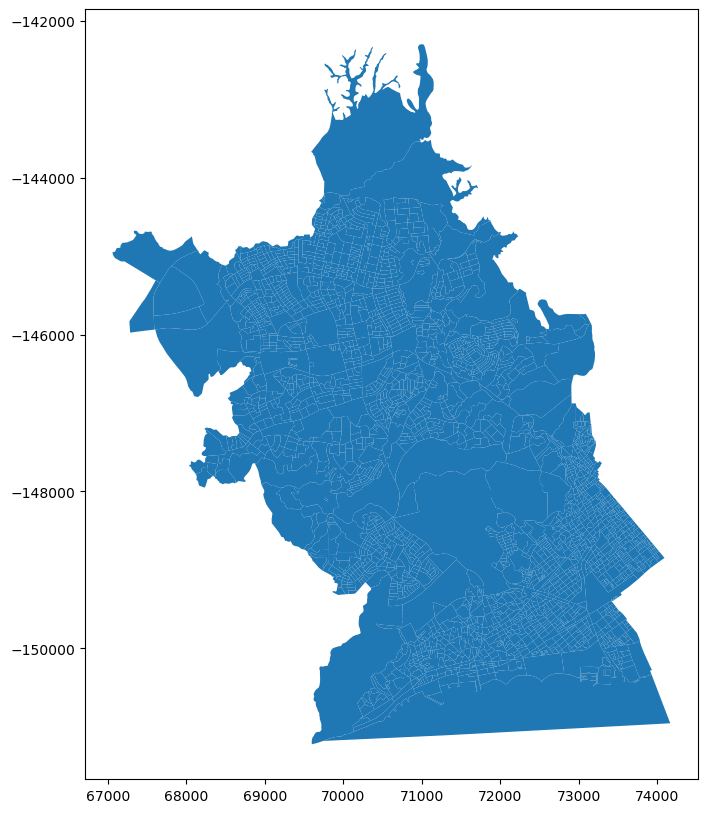

In [9]:
data.plot(figsize=(15, 10))

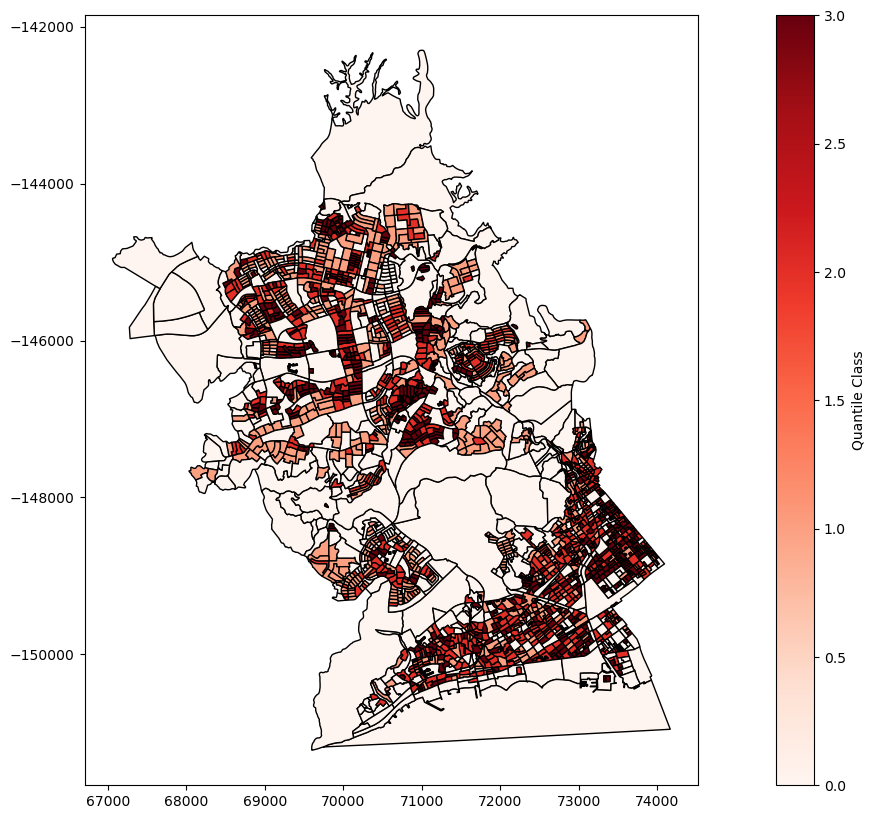

In [16]:
# JINKO_density 列を計算
data['JINKO_density'] = data['JINKO'] / data['AREA']

# 等量分類
quantiles = [0, 0.25, 0.5, 0.75, 1.0]  # 分位点
class_bins = pd.qcut(data['JINKO_density'], quantiles, labels=False, duplicates='drop')
data['class_bins'] = class_bins

# カラーマップの設定
cmap = 'Reds'  # 必要に応じて変更
fig, ax = plt.subplots(figsize=(20, 10)) 

# JINKO_density 列の最小値と最大値を取得
min_value = data['JINKO_density'].min()
max_value = data['JINKO_density'].max()

# 各地域のJINKO_densityの値に基づいて色分けしてプロット
data.plot(column='class_bins', cmap=cmap, legend=True, ax=ax, legend_kwds={'label': "Quantile Class"}, edgecolor='black')

# カラーバーを追加
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=len(quantiles) - 1))
sm.set_array([])

# プロット表示
plt.show()